# Visualising pairwise alignments

### Make crunch files for visualisation of pairwise alignments of Msmeg mutants

Use ncbi blast software
(in conda env blast_plus)

https://www.biostars.org/p/142951/

ACT	can	display	pairwise	comparisons	between	genomes.	To	do	this	it	
needs	the	genome	sequences	themselves	(in	FASTA format	or	annotated	
sequence	format	such	as	Genbank	or	EMBL	files)	and	a	comparison	file.
Comparison	files	can	be	created	on	your	computer	if	you	have	BLAST	installed.

https://katholtlab.files.wordpress.com/2017/07/comparativegenomicstutorialv2.pdf


To examine detailed pairwise alignment using ACT:

1. order the contigs using Mauve (generates multi-fasta format file of ordered contigs) 
    -select 'move contigs' in alignment, first choose folder for output, then sequences (reference first)
    
    [mauve contig mover](https://darlinglab.org/mauve/user-guide/reordering.html#:~:text=The%20Mauve%20Contig%20Mover%20can,the%20reference%20can%20be%20identified.)

2. Choose alignment (with highest number) and rename unordered.fasta to ordered.fasta; delete unused alignment folder
    -can use created alignment to view in mauve (but need to do this step first to generate ordered contig file)
3. Make a single fasta of contigs from mutant assembly 
    -using artemis:write fasta of all bases
    -use bash script below
3. make comparison file (.crunch) using ncbi blast tools (or MSPCrunch https://sonnhammer.sbc.su.se/download/software/MSPcrunch+Blixem/) with single fasta of contigs and reference fasta
4. load reference gbank file, crunch file and ordered contigs (not single fasta) onto ACT


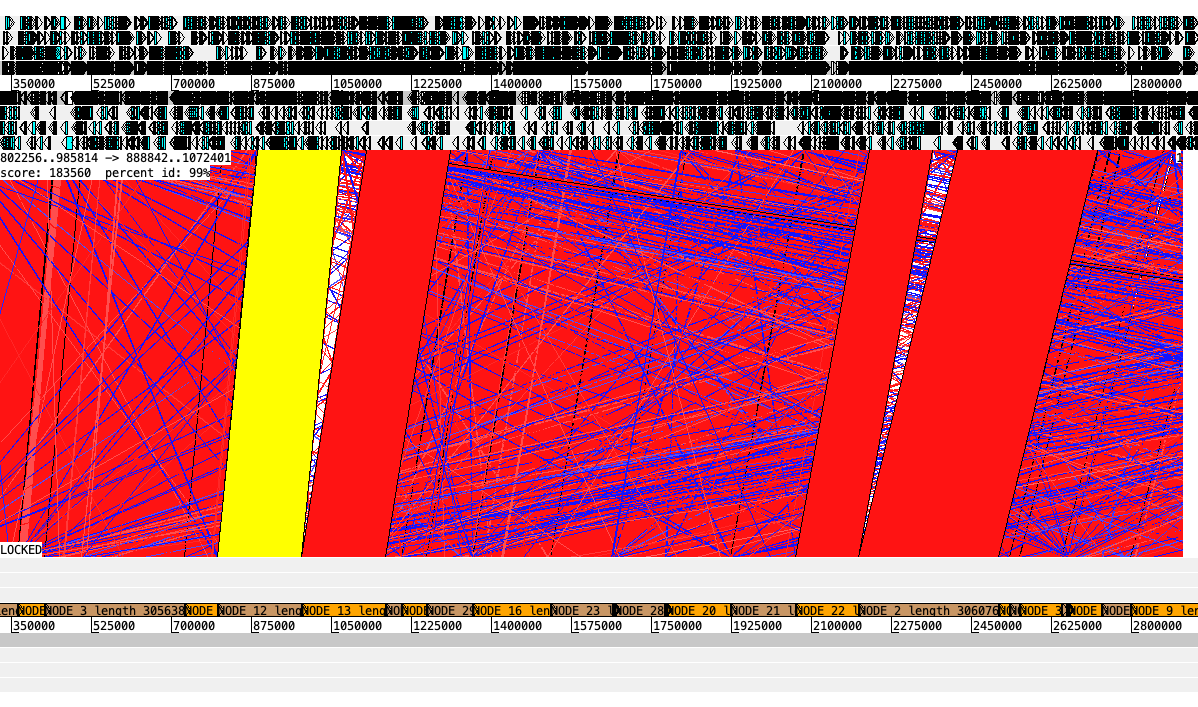

visualising the mutation

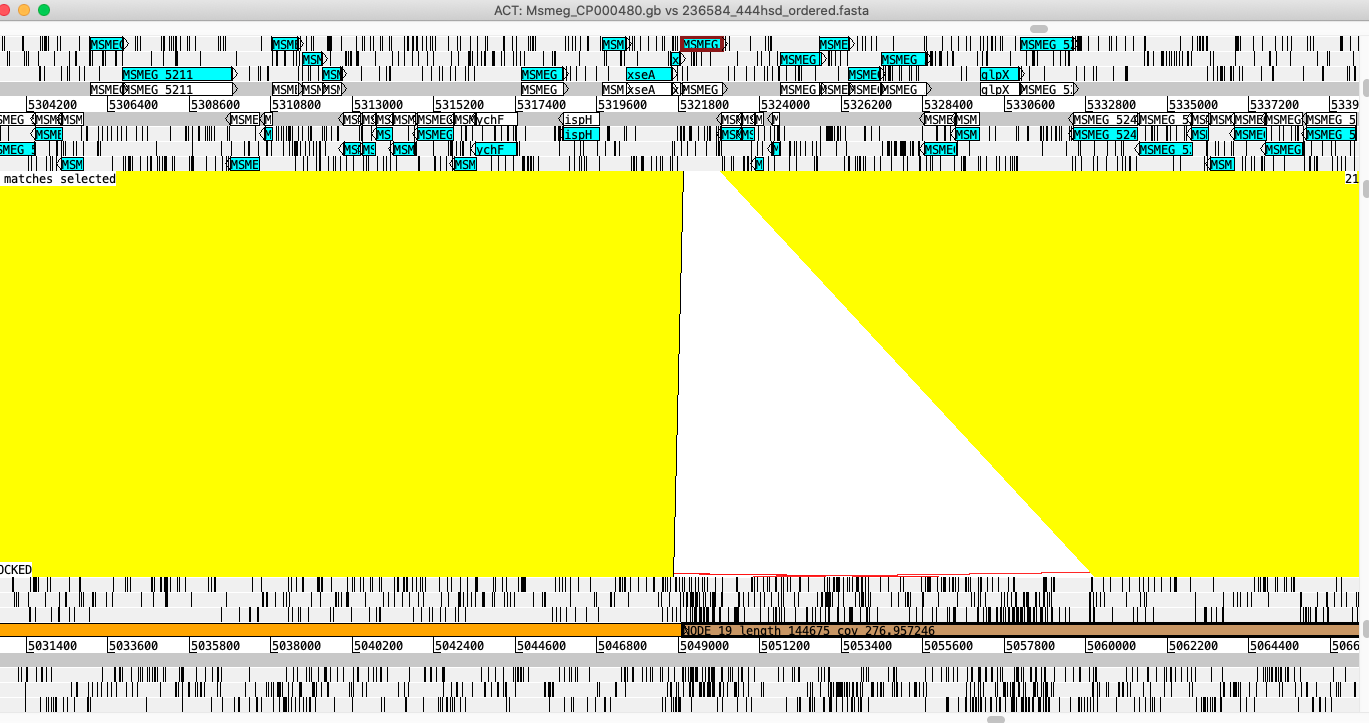

In [ ]:
#concatenate contigs to single fasta for making comparison files
# hardline breaks every 80 characters, adapted from (https://github.com/jrjhealey/stuff_for_others/blob/master/concatenate_contigs.sh)
# change header to name of file
#usage: ./concatenate_contigs.sh <contigs.fasta> <output.fasta>
#!/bin/bash
FILE=$1
filename=$(basename "$FILE" .fasta)
#replace first line with filename (double quotes needed for variable to be read)
cat $FILE | sed -e '1!{/^>.*/d;}' | sed "1 s/^.*$/>${filename}_all_bases/" | sed '1!s/.\{80\}/&\n/g' > $2


#first step removes all the headers except first one
#second replace header with filename and 'all bases'
#third step adds a newline every 80 characters


In [ ]:
#makeblastdb -in Genome1 -dbtype nucl
#blastn -query Genome2 -db Genome1 -evalue 1 -task megablast -outfmt 6 > Genome1_Genome2.crunch

cd ~/myco_projects/Msmeg_mutants
conda activate blast_plus
makeblastdb -in ~/myco_projects/ref_seqs/Msmeg/Msmeg_CP000480.fasta -dbtype nucl #will create db where fasta file located
blastn -query mutant_236584_444_single.fasta -db ~/myco_projects/ref_seqs/Msmeg/Msmeg_CP000480.fasta -evalue 1 -task megablast -outfmt 6 > mutant_236584_444.crunch

In [ ]:
#try again with different reference sequence
makeblastdb -in ~/myco_projects/ref_seqs/Msmeg/NC_008596.1.fasta -dbtype nucl 
blastn -query mutant_236584_444_single.fasta -db ~/myco_projects/ref_seqs/Msmeg/NC_008596.1.fasta -evalue 1 -task megablast -outfmt 6 > mutant_236584_444_new.crunch

# Using BV-BRC to annotate contig file using genome of Msmeg

https://www.bv-brc.org/app/Annotation
https://www.bv-brc.org/docs/tutorial/genome_annotation/genome_annotation.html

Perform Genome annotation

Use unordered contig file and fasta file for reference
-contigs.fasta not ordered

Organism name/ID: 246196

![genome annotation](images/BV_BRC_genome_ann.png)

Helpful for identifying gaps and missing features. Also quality of assembly metrics.
Nothing to use for viewing alignment but can show neighbourhood of problematic features

# use bwa-mem to map contigs to reference

give more generous gap penalty

bwa mem -t 8 -E 0.5 output/genome/ref/seq/celegans.fa input

probably not best option. Mauve very easy for ordering/aligning/visualising in one tool


# make a dotplot of two genomes

https://dgenies.toulouse.inra.fr/

uses minimap2

Used ordered contigs (used those made with mauve). Helpful to visualise two gaps in alignment but not easy to see what coordinates are. can sort contigs after plotting.

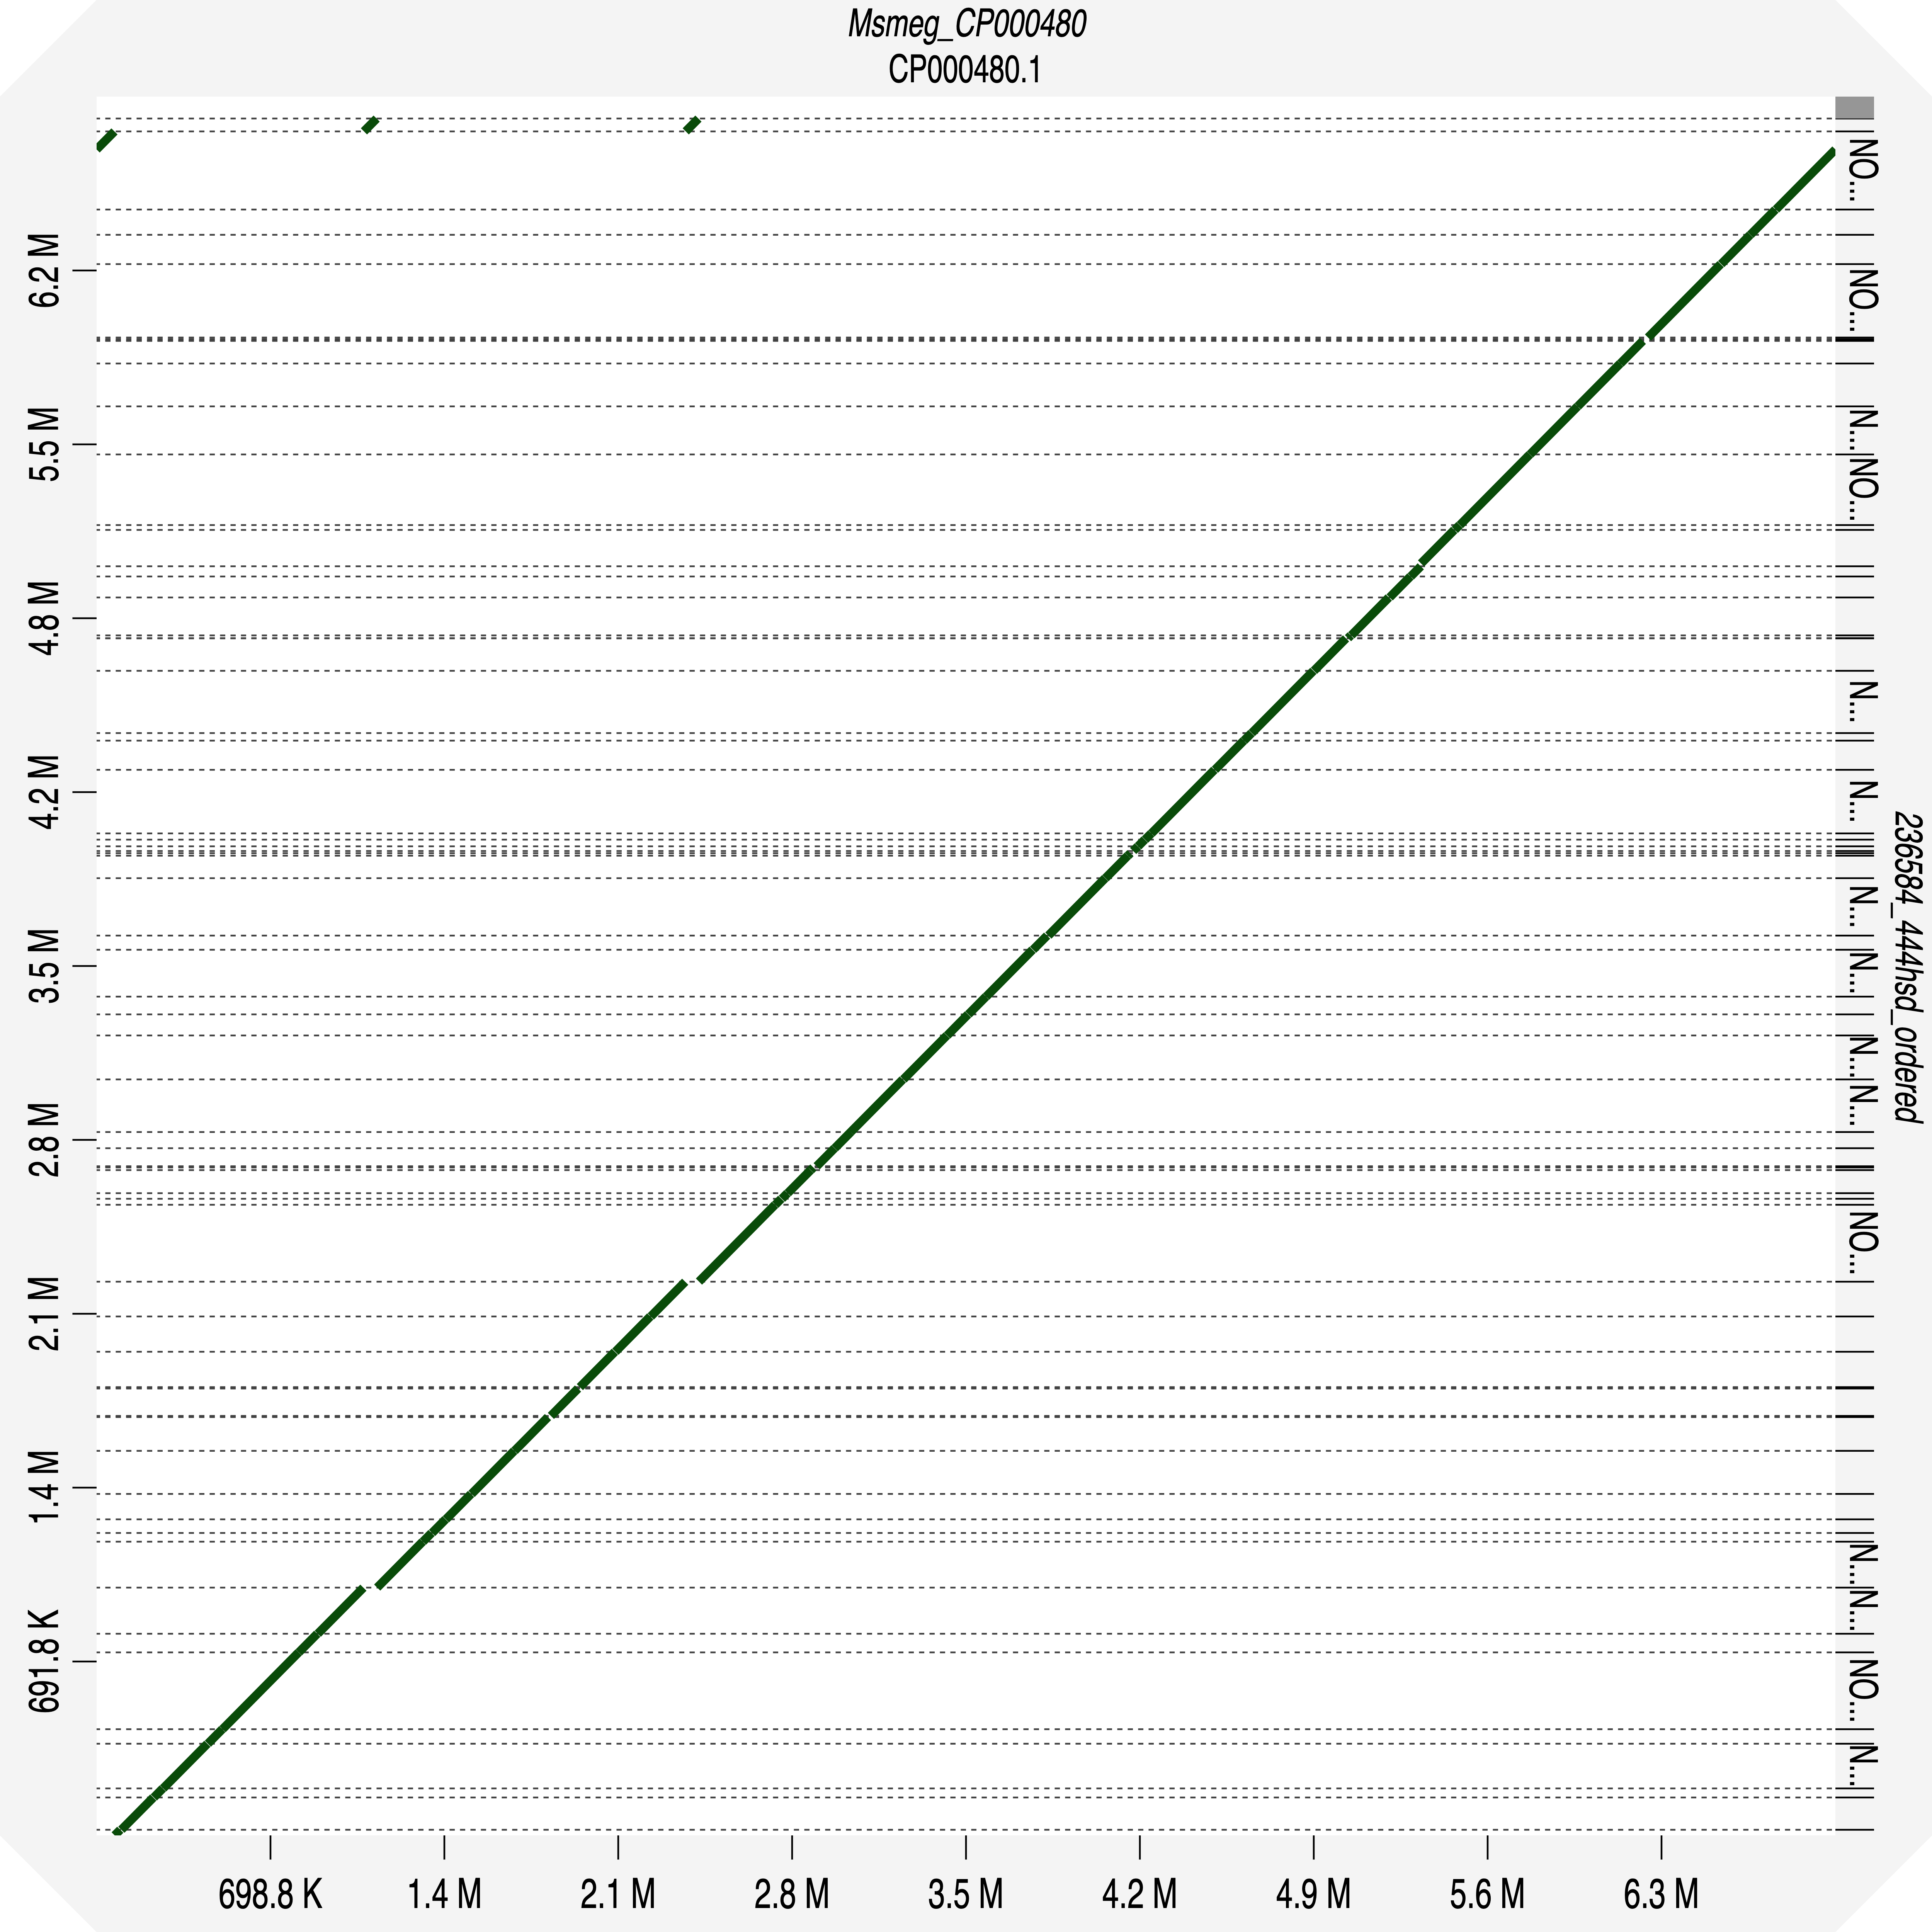

# visualise alignment with mauve

https://darlinglab.org/mauve/user-guide/viewer.html

https://www.geneious.com/tutorials/aligning-bacterial-genomes-mauve/#:~:text=Mauve%20Genome%20Alignment%20View&text=Each%20sequence%20is%20represented%20by,LCBs%20(locally%20collinear%20blocks).

use progressive mauve to align contigs (ordered, though this looks like unordered--mislabelled) with fasta of reference genome. Easy to see the gaps but not the associated genes

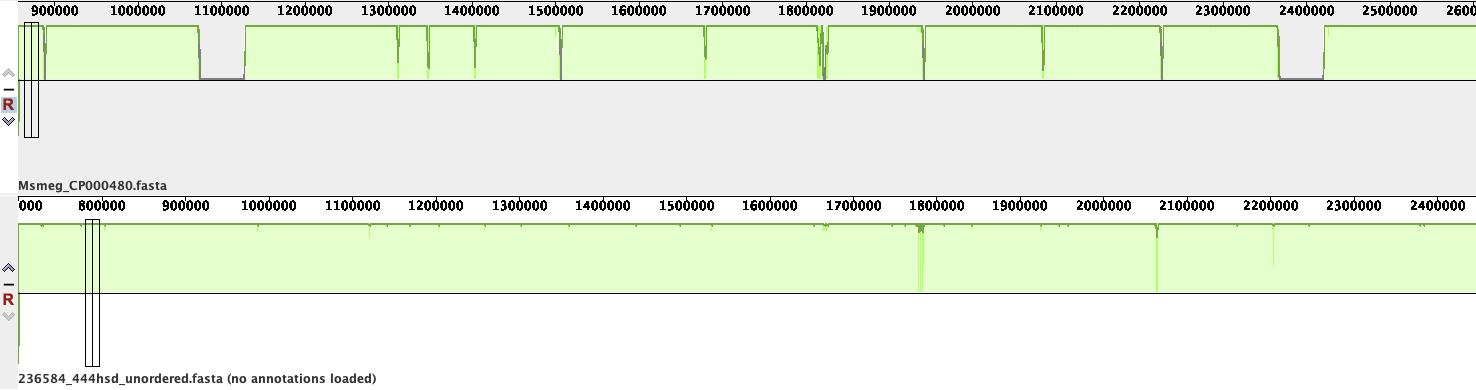

Load with genbank file of reference and it will have annotated features below. Must zoom in to see and hover over blocks. Can click to view details of feature. Can search by gene name, etc. 

View>style>annotated features>show all

This seems most useful--can see gaps and hover to find genes. This gap below appears to be located where two contigs are joined. more likely gap in assembly than a deletion

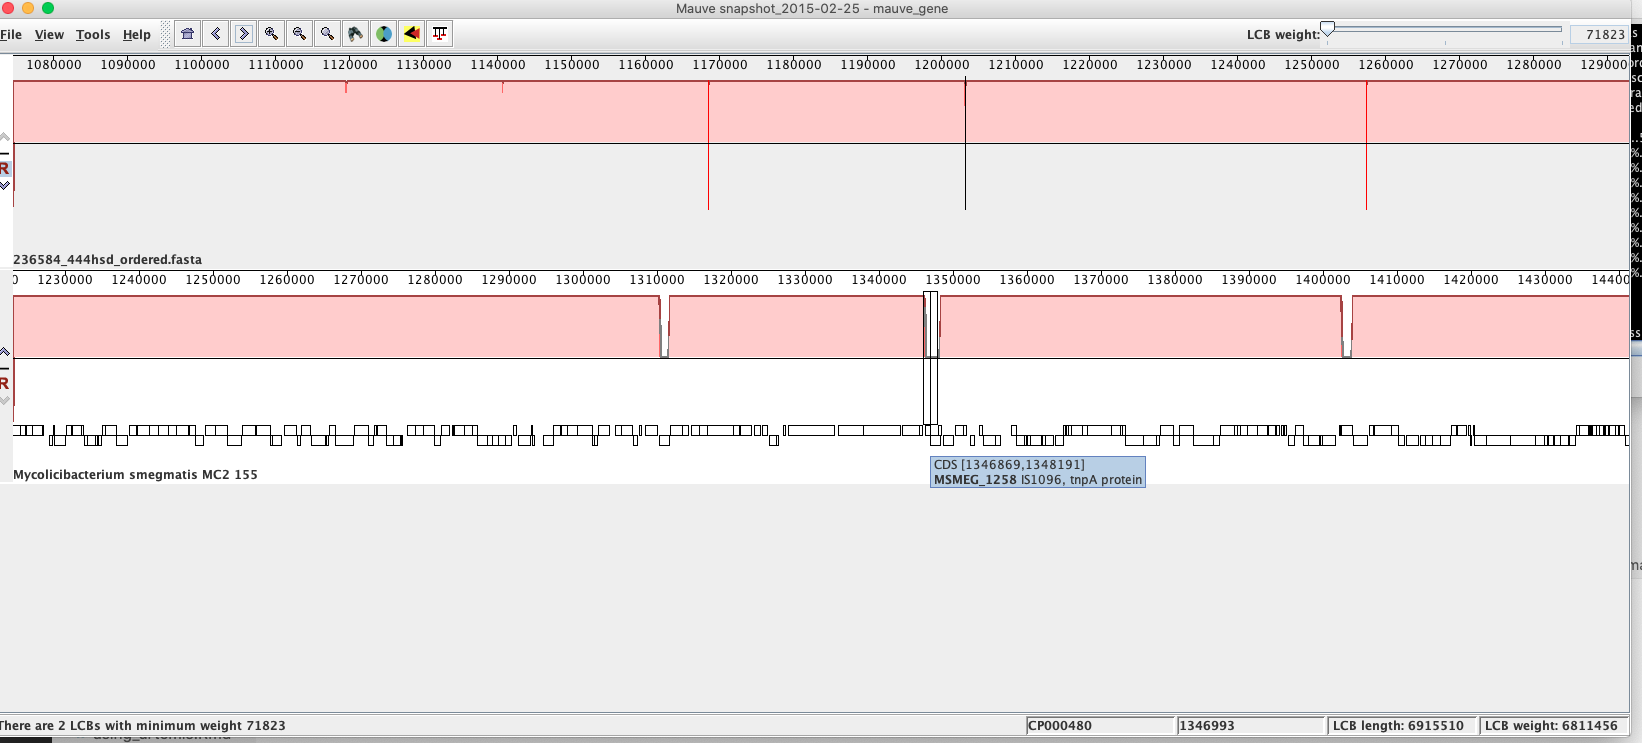

Here is where the relevant construct (insertion/deletion?) is occuring in the mutant. can see gap in both mutant and reference strains in the middle of contig

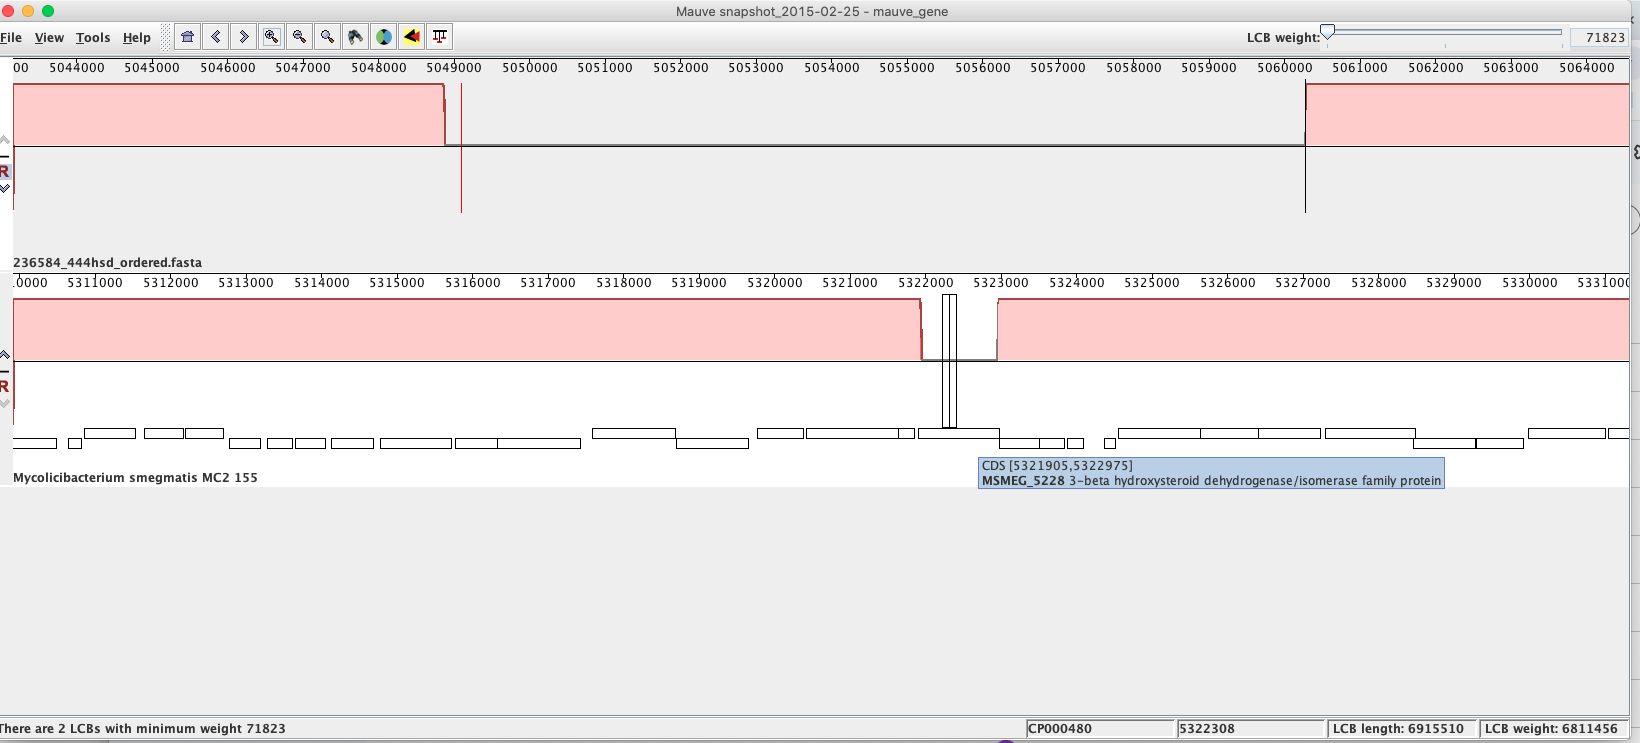


### adjust parameters of mauve to reduce noise etc

default mode is basically looking for moderate to high level of genome rearrangements. we should have very low level of rearrangements

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC442156/

> The weight of an LCB provides a measure of confidence that it is a true genome rearrangement rather than a spurious match. By selecting a high minimum weight during alignment, the user can identify genome rearrangements that are very likely to exist, whereas by selecting a lower minimum weight, the user can trade some specificity for sensitivity to smaller genome rearrangements. (Darling et al, 2004, *Genome Research*)

This is adjustable in the viewing window

Used seed families and assumed collinear genomes since hardly any rearrangements and very close sequences. Assuming collinear genome causes errors.


## summary of steps to create and view alignment in mauve

Order the contigs
1. Open mauve app
2. Tools > Move contigs
3. select output folder
4. add sequences: reference fasta (must be first), downloaded contig.fasta file
5. 'Start'
6. Within folder last of iterated alignmens (the one with the highest number), find contig.fasta folder and rename 'ordered'. This can be used subsequently for viewing alignments with genbank file

Can also use the .gb format for the draft genome--will be converted to a .fasta file in the end. Seems to work faster than fasta.

Visualise alignment with annotated genes
1. Open mauve app
2. File > align with Progressive Mauve
3. add sequences:  ordered.fasta file of contigs and reference genbank file
4. Run alignment with default parameters
5. to show reference genes, View > style > annotated features > always show and zoom in


Results:

With 236585 alignment appeared to have rearrangements and blocks were flipped? look at the contigs.tab file and it looks like a lot of the contigs had to be flipped to align. Re-did with all default settings and using .gb format for draft instead with the move contigs (wasn't getting good alignments with the fasta?), performed 3 alignments vs 2 for other samples but alignment better? use Genus species strain.fas file for further alignment. Shows deletion.

![move contigs](images/mauve_move_contigs.png)

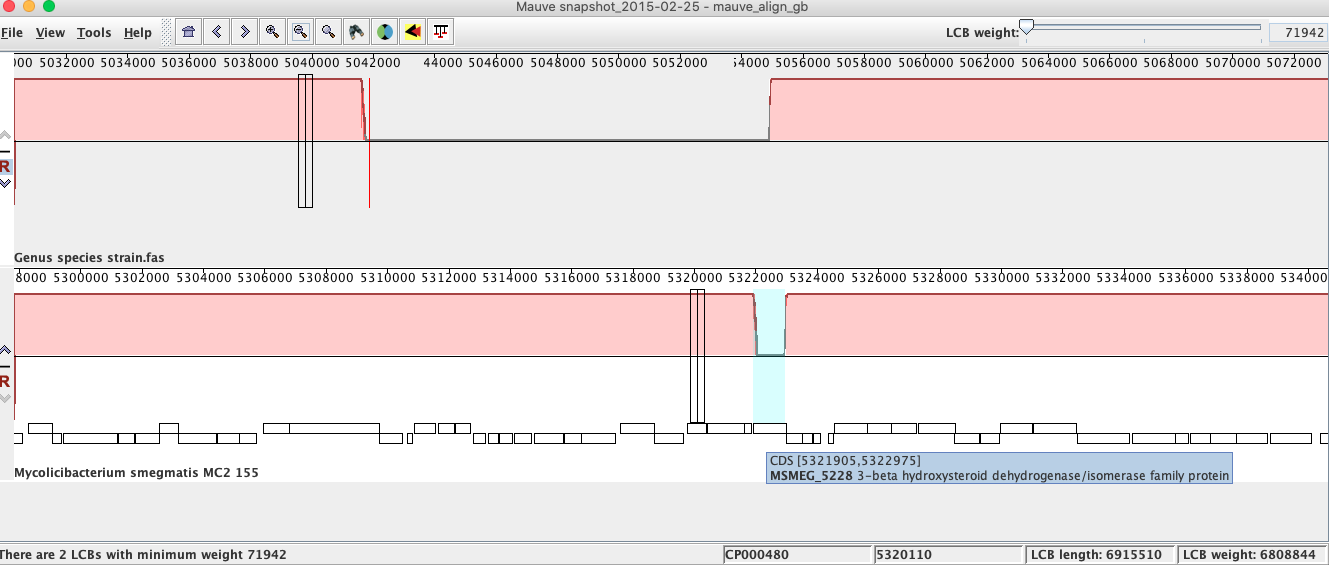


for 236587 used gb file for ordering contigs (didn't try with fasta)

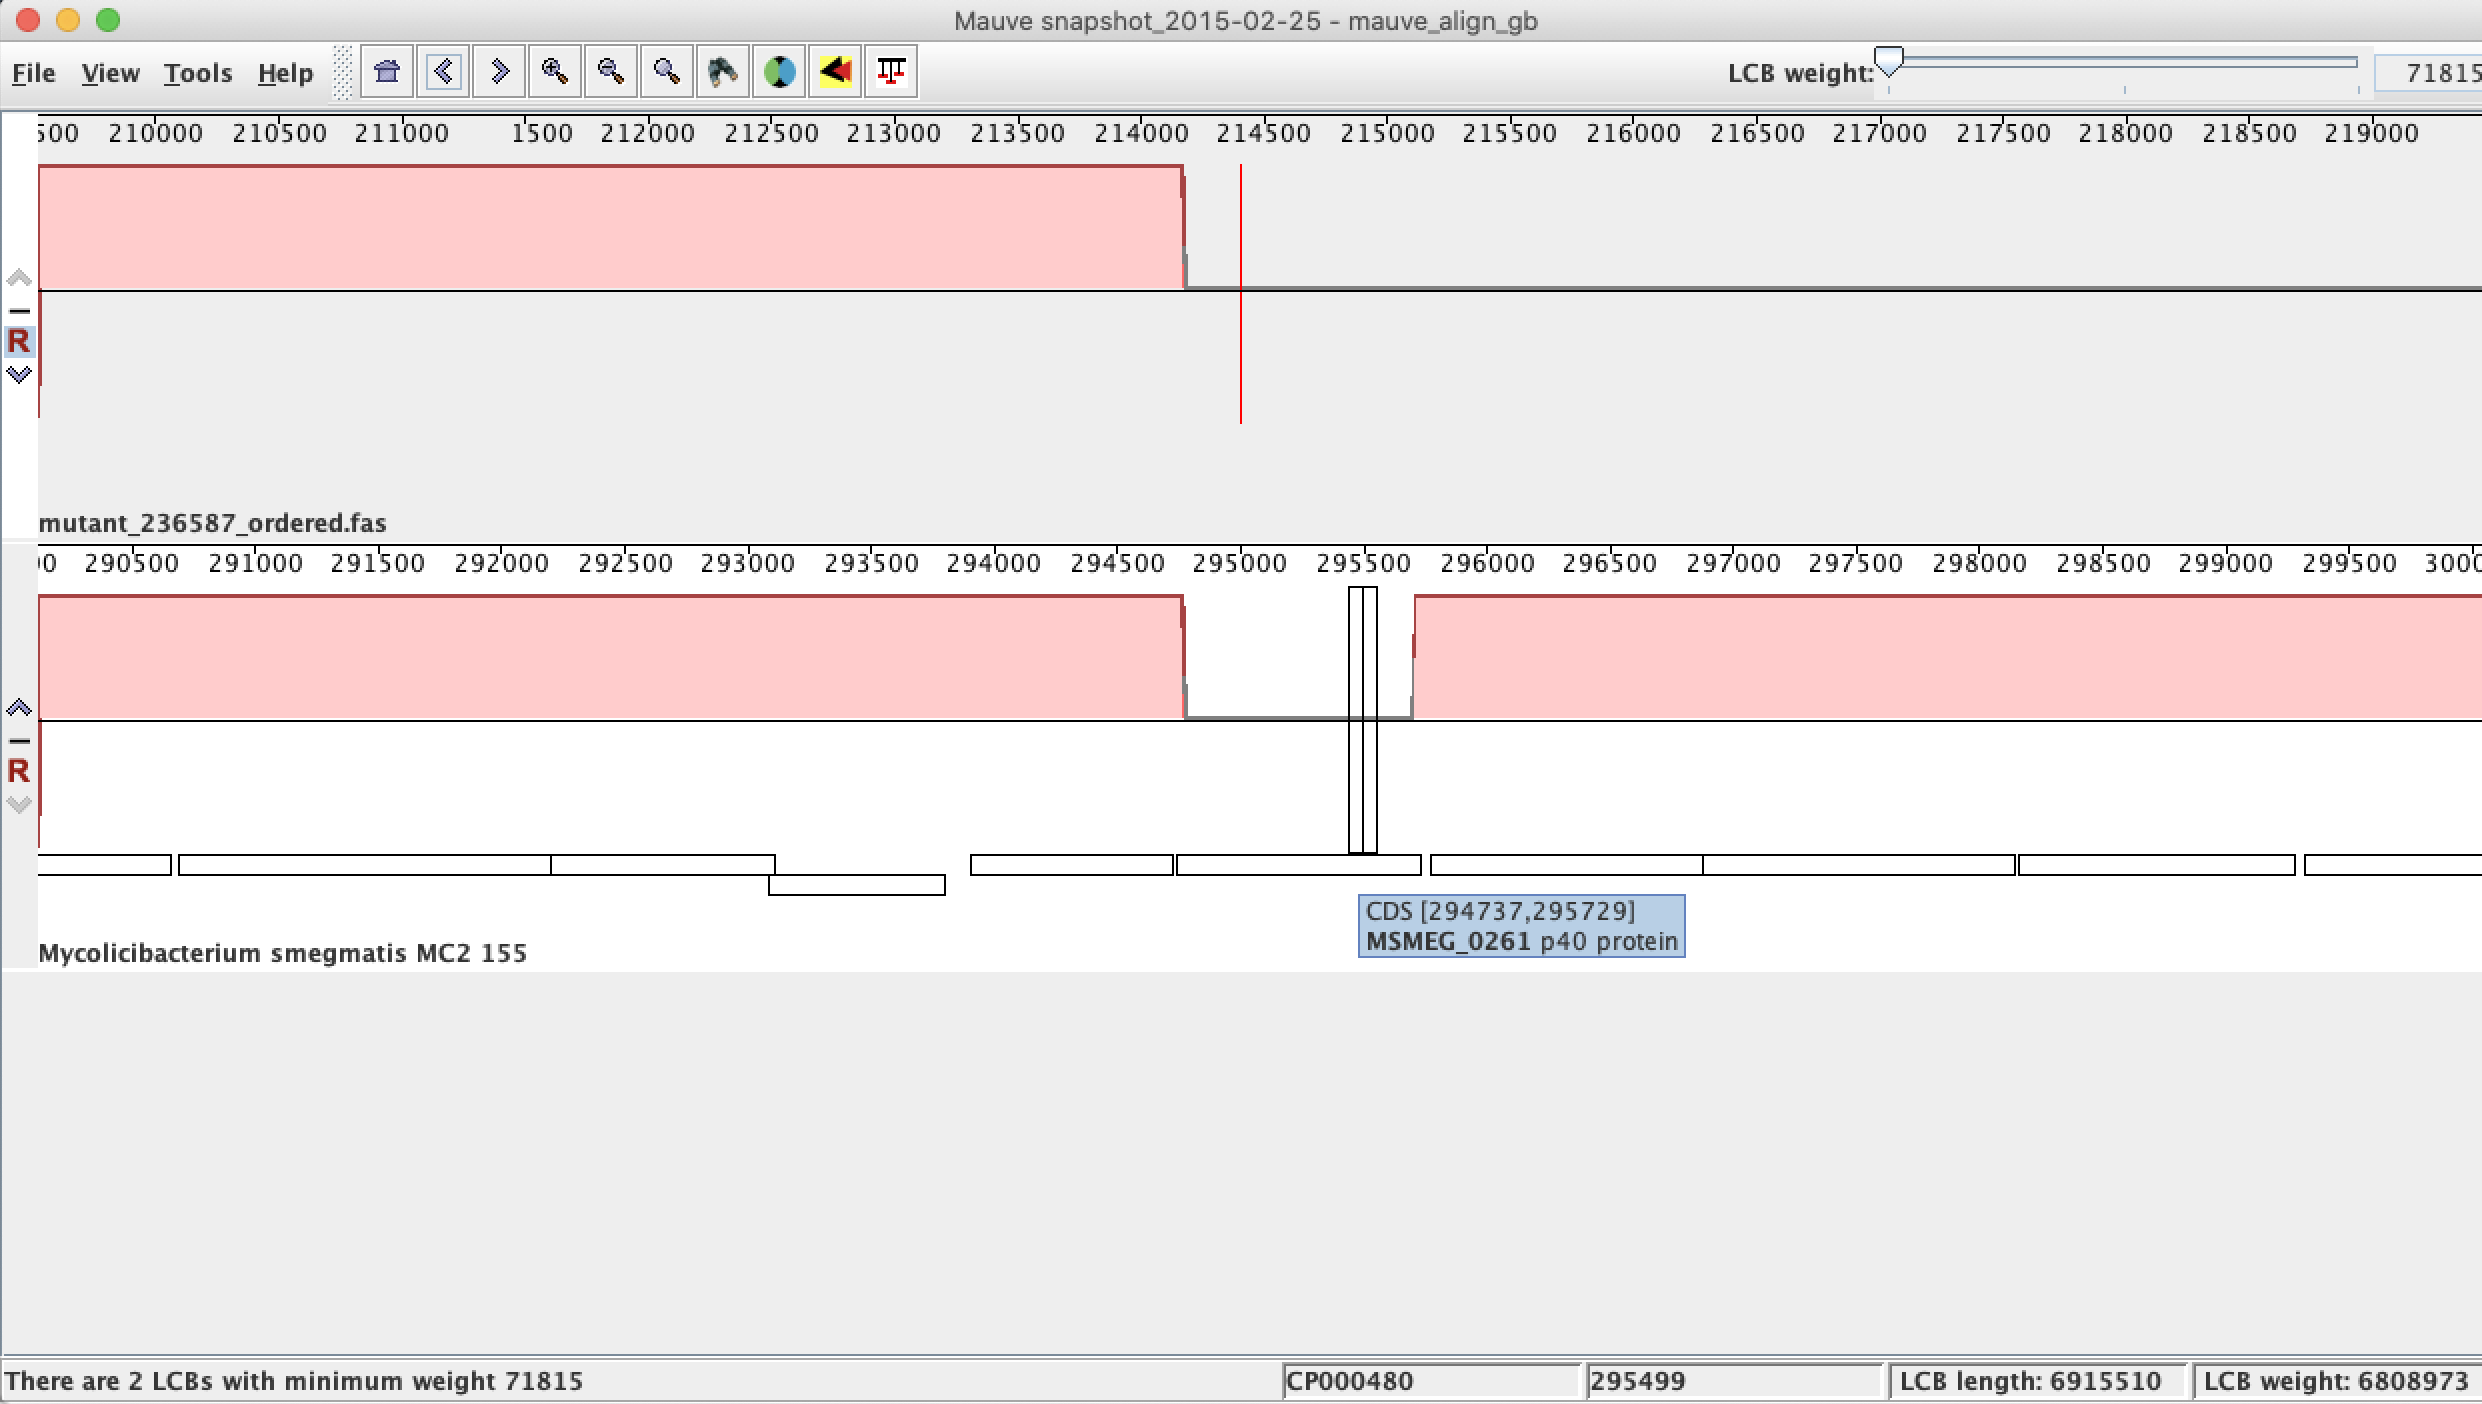

## visualise aligned assembly with artemis

microbesNG also provides a .bam file for each sample aligned to reference genome.

this can be visualised on Artemis (use reference.fasta and reference.gff) add BAM and use either paired stack or strand stack view. Should be able to see if region is covered in mutant assembly.